# Confusion Matrix

## Importing libraries

In [154]:
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib
import matplotlib.pyplot as plt

Printing versions of libraries

In [155]:
print('numpy version: {}'.format(np.__version__))
print('skikit-learn version: {}'.format(sklearn.__version__)) 
print('matplotlib version: {}'.format(matplotlib.__version__))

numpy version: 1.23.5
skikit-learn version: 1.2.1
matplotlib version: 3.7.0


## What is confusion matrix?

A confusion matrix is a table layout that allows visualization of the performance of a classification algorithm. In a confusion matrix, each row represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa. It makes it easy to see how many observations were classified (labelled) incorrectly.

A binary confusion matrix uses four kinds of results, true positive, false negative, false positive and true negative along with positive and negative classifications. The four outcomes can be formulated in a 2x2 confusion matrix, as shown below. 

![Confusion Matrix](confusion_matrix.png)

Confusion matrix makes it easier to calculate different metrics related to classification. We can calculate accuracy, precision, recall and f1-score using facts from the confusion matrix. 

    Accuracy is a metric that measures how well a binary classifier can correctly identify the true and false classes. 
        Accuracy = (TP + TN) / (TP + FN + FP + TN)
        
    Precision is a metric that measures how well a classifier can correctly identify the positive class. 
        Precision = TP / (TP + FP) 
        
    Recall is a metric that measures how well a classifier can correctly identify the positive class. 
        Recall = TP / (TP + FN)
    
    F1-score is a metric that measures the harmonic mean of precision and recall for a classifier.  F1-score can range from 0 to 1, where 1 means perfect precision and recall and 0 means no correct classification. 
        F1-Score = (2 x Precision x Recall) / (Precision + Recall)
    

Refer to following link for detail and comprehensive description of confusion matrix.

https://en.wikipedia.org/wiki/Confusion_matrix

## Confusion Matrix in case of Binary Classification

Creating dummy data for actual and predicted labels

In [156]:
actual = np.array(
    ['Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog'])
predicted = np.array(
    ['Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog'])

Computing confusion matrix

In [157]:
cm = confusion_matrix(actual, predicted)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[4 1]
 [2 3]]


Plotting the confusion matrix

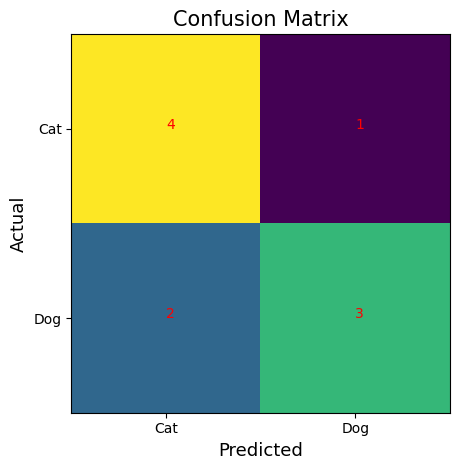

In [158]:
fig, ax = plt.subplots()
im = ax.imshow(cm)

# Showing all ticks and labelling them with the respective list entries
ax.set_xticks(np.arange(2), labels=['Cat', 'Dog'])
ax.set_yticks(np.arange(2), labels=['Cat', 'Dog'])

# Setting labels for x-axis and y-axis
ax.set_xlabel('Predicted', fontsize=13)
ax.set_ylabel('Actual', fontsize=13)

# Creating text annotations.
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j], color='r')

ax.set_title('Confusion Matrix', fontsize=15)
fig.tight_layout()
plt.show()

Computing accuracy, precision, recall and f1-score manually.

In [159]:
accuracy = (4 + 3)/(4 + 1 + 2 + 3)
print('Accuracy  :', accuracy)
precision = 4 / (4 + 2)
print('Precision :', precision) 
recall = 4 / (4 + 1)
print('Recall    :', recall)
F1_Score = (2 * precision * recall) / (precision + recall)
print('F1-Score  :', F1_Score)

Accuracy  : 0.7
Precision : 0.6666666666666666
Recall    : 0.8
F1-Score  : 0.7272727272727272


Computing accuracy, precision, recall and f1-score using sklearn.metrics.

In [160]:
accuracy = accuracy_score(actual, predicted)
print('Accuracy  :', accuracy)
precision = precision_score(actual, predicted, pos_label='Cat')
print('Precision :', precision) 
recall = recall_score(actual, predicted, pos_label='Cat')
print('Recall    :', recall)
F1_Score = f1_score(actual, predicted, pos_label='Cat')
print('F1-Score  :', F1_Score)

Accuracy  : 0.7
Precision : 0.6666666666666666
Recall    : 0.8
F1-Score  : 0.7272727272727272


## Confusion Matrix in case of Multi-Class Classification

Importing libraries

In [161]:
from sklearn.metrics import precision_recall_fscore_support

Creating dummy data for actual and predicted labels

In [162]:
actual = np.array(
    ['Cat', 'Dog', 'Dog', 'Pig', 'Cat', 'Cat', 'Dog', 'Pig', 'Pig', 'Dog'])
predicted = np.array(
    ['Pig', 'Cat', 'Dog', 'Pig', 'Dog', 'Cat', 'Cat', 'Dog', 'Pig', 'Dog'])

In [163]:
cm = confusion_matrix(actual, predicted)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[1 1 1]
 [2 2 0]
 [0 1 2]]


Plotting the confusion matrix

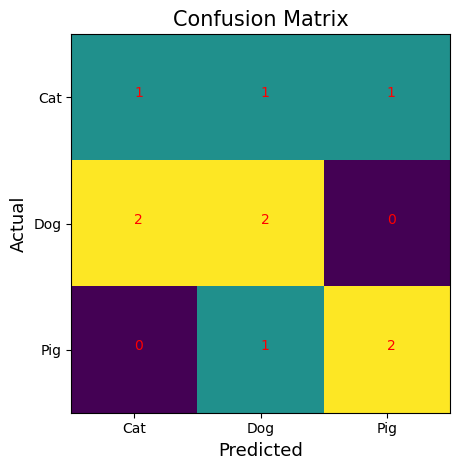

In [164]:
fig, ax = plt.subplots()
im = ax.imshow(cm)

# Showing all ticks and labelling them with the respective list entries
ax.set_xticks(np.arange(3), labels=['Cat', 'Dog', 'Pig'])
ax.set_yticks(np.arange(3), labels=['Cat', 'Dog', 'Pig'])

# Setting labels for x-axis and y-axis
ax.set_xlabel('Predicted', fontsize=13)
ax.set_ylabel('Actual', fontsize=13)

# Creating text annotations.
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, cm[i, j], color='r')

ax.set_title('Confusion Matrix', fontsize=15)
fig.tight_layout()
plt.show()

Computing accuracy, precision, recall and f1-score manually. For a multi-class classification problem, precision can be calculated for each class individually, and then averaged to get the overall precision. There are different ways to average the precision, such as micro, macro, or weighted average2. We will further calculate overall precision using micro average below.

In [165]:
accuracy = (1 + 2 + 2) / (1 + 1 + 1 + 2 + 2 + 0 + 0 + 1 + 2)
print('Accuracy  :', accuracy, '\n')

precision_cat = 1 / (1 + 2 + 0)
print('Precision (Cat) :', precision_cat)
precision_dog = 2 / (1 + 2 + 1)
print('Precision (Dog) :', precision_dog)
precision_pig = 2 / (1 + 0 + 2)
print('Precision (Pig) :', precision_pig, '\n')

recall_cat = 1 / (1 + 1 + 1)
print('Recall (Cat)    :', recall_cat)
recall_dog = 2 / (2 + 2 + 0)
print('Recall (Dog)    :', recall_dog)
recall_pig = 2 / (0 + 1 + 2)
print('Recall (Pig)    :', recall_pig, '\n')

f1_score_cat = (2 * precision_cat * recall_cat)/ (precision_cat + recall_cat)
print('F1-score (Cat)   :', f1_score_cat)
f1_score_dog = (2 * precision_dog * recall_dog)/ (precision_dog + recall_dog)
print('F1-score (Cat)   :', f1_score_dog)
f1_score_pig = (2 * precision_pig * recall_pig)/ (precision_pig + recall_pig)
print('F1-score (Cat)   :', f1_score_pig)

Accuracy  : 0.5 

Precision (Cat) : 0.3333333333333333
Precision (Dog) : 0.5
Precision (Pig) : 0.6666666666666666 

Recall (Cat)    : 0.3333333333333333
Recall (Dog)    : 0.5
Recall (Pig)    : 0.6666666666666666 

F1-score (Cat)   : 0.3333333333333333
F1-score (Cat)   : 0.5
F1-score (Cat)   : 0.6666666666666666


Computing accuracy, precision, recall and f1-score using sklearn.metrics.

In [166]:
accuracy = accuracy_score(actual, predicted)
print('Accuracy  :', accuracy)
precision, recall, fscore, _ = precision_recall_fscore_support(actual, predicted)
print('Precision :', precision)
print('Recall    :', recall)
print('F1-score   :', fscore)

Accuracy  : 0.5
Precision : [0.33333333 0.5        0.66666667]
Recall    : [0.33333333 0.5        0.66666667]
F1-score   : [0.33333333 0.5        0.66666667]


Computing overall accuracy, precision, recall and f1-score using micro average. Overall precision is simply average of individual precision values of each class (cat, dog and pig). Overall recall is simply average of individual recall values of each class (cat, dog and pig). Overall f1-score is simply average of individual f1-score values of each class (cat, dog and pig).

In [167]:
accuracy = accuracy_score(actual, predicted)
print('Accuracy  :', accuracy)
precision, recall, fscore, _ = precision_recall_fscore_support(actual, predicted, average='micro')
print('Overall Precision :', precision)
print('Overall Recall    :', recall)
print('Overall F1-score   :', fscore)

Accuracy  : 0.5
Overall Precision : 0.5
Overall Recall    : 0.5
Overall F1-score   : 0.5
